1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np
m = np.arange(12).reshape((3,4))

totalMean =  np.mean(m) #media totale
print(f"Total mean: {totalMean}")

rowMean = np.mean(m, axis=1) #media colonne
print(f"Row mean: {rowMean}")

columnMean = np.mean(m, axis=0) #media righe
print(f"Column mean: {columnMean}")

Total mean: 5.5
Row mean: [1.5 5.5 9.5]
Column mean: [4. 5. 6. 7.]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [4]:
import numpy as np

u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

# outer product utilizzando numpy.outer
outer_np = np.outer(u,v)
print(f"Outer product with numpy.outer: \n{outer_np}")

# outer product utilizzando un ciclo for
outer_for = []
for a in u:
    for b in v:
        outer_for.append(a*b)
        
outer_for = (np.array(outer_for)).reshape(4,4)
print(f"\nOuter product with for loop: \n{outer_for}")

# outer product utilizzando broadcast
outer_broad = u*v.reshape(len(v),1)
print(f"\nOuter product with outer_broad: \n{outer_broad}")

Outer product with numpy.outer: 
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Outer product with for loop: 
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Outer product with outer_broad: 
[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [5]:
import numpy as np

matr = np.random.uniform(0,3,[10,6])
print(f"Matrix: \n{matr}")

#creo la maschera
mask = (matr < 0.3)

#applico la maschera
matr[mask] = 0
print(f"\nMatrix with mask (<0.3 -> 0):\n{matr}")

Matrix: 
[[0.16950052 1.00974237 0.22950602 1.28590121 0.09822626 2.00274957]
 [2.50903219 2.89229442 2.81077859 0.39092757 2.8432728  2.51824085]
 [1.9709194  2.90337569 0.73023353 1.8925382  2.28523963 0.95566375]
 [0.76173774 1.21353041 2.10215405 0.76764361 2.11746215 0.04760208]
 [0.70858702 1.50157641 2.69330672 2.71359712 0.93063114 0.90778686]
 [1.03871823 0.13724727 0.24803736 1.49327909 1.36524942 1.02437287]
 [2.02723932 1.52635293 1.98192993 0.67125018 2.47964925 1.14691252]
 [1.01478198 0.67455275 0.26221347 0.42350241 1.95413773 2.76548144]
 [2.3493723  2.87003236 0.18220732 2.53763394 2.68408004 2.04645471]
 [2.66316352 2.96930218 1.95078278 1.71984683 2.85137638 0.6377574 ]]

Matrix with mask (<0.3 -> 0):
[[0.         1.00974237 0.         1.28590121 0.         2.00274957]
 [2.50903219 2.89229442 2.81077859 0.39092757 2.8432728  2.51824085]
 [1.9709194  2.90337569 0.73023353 1.8925382  2.28523963 0.95566375]
 [0.76173774 1.21353041 2.10215405 0.76764361 2.11746215 0.   

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

Original array:
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.

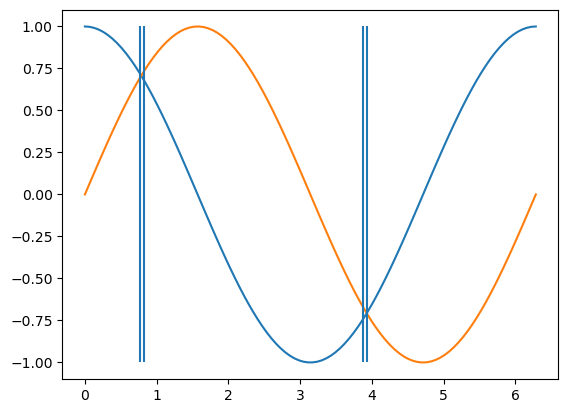

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

ar = np.linspace(0,2*math.pi,100)
print(f"Original array:\n {ar}")

#estraggo i decimi elementi
slice_ar = ar[0:100:10]
print(f"\nSlice elem array:\n {slice_ar}")

#inverto la matrive
rev_ar = ar[::-1]
print(f"\nReverse array:\n {rev_ar}")

#estraggo gli elementi: Abs of sin-cos of array<0.1
mask = (abs(np.sin(ar)-np.cos(ar))<0.1)
abs_ar = ar[mask] 
print(f"\nAbs of sin-cos of array<0.1:\n {abs_ar}")

#PLOT
print("\nSin and cos functions:")
plt.plot(ar,np.cos(ar))  
plt.plot(ar,np.sin(ar))

#punti in cui sono vicini
plt.vlines(ar[abs(np.sin(ar)-np.cos(ar))<0.1],-1,1)
plt.show()

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [7]:
import numpy as np

#creo la matrice delle moltiplicazioni
rng = np.arange(1, 11)
mult_table = rng * rng[:, None]
print(f"10 by 10 multiplication table: \n{mult_table}")

#trace della matrice
trace_m = np.trace(mult_table)
print(f"\nTrace of the matrix: {trace_m}")

#estraggo l'anti-diagonale della matrice
ant_diag = np.fliplr(mult_table).diagonal() #prima inverto la matrice left-right poi estraggo la diagonale
print(f"\nAnti-diagonal matrix: {ant_diag}")

#estraggo la diagonale della matrice con offset 1
off_diag = mult_table.diagonal(1)
print(f"\nDiagonal offset by 1 upwards: {off_diag}")

10 by 10 multiplication table: 
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Trace of the matrix: 385

Anti-diagonal matrix: [10 18 24 28 30 30 28 24 18 10]

Diagonal offset by 1 upwards: [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [8]:
import numpy as np
#creo l'array di base-riferimento
pos_miles_base = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

#lista che conterrà tutte le distanze
pos_miles=[]

#per ogni città
for i in pos_miles_base:
    
    #faccio il confronto con tutte le altre
    for a in pos_miles_base:
        
        #caso in cui la città è dopo
        if(a<i):
            pos_miles.append(i-a)
            
        #caso in cui è la città stessa -> faccio il conto lo stesso per verificare che sia corretto
        elif(a==i):
            pos_miles.append(i-a)
            
        #caso in cui la città è prima
        elif(a>i):
            pos_miles.append(a-i)

print("City:\nChicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles\n")
pos_miles=np.array(pos_miles) #converto in numpy array
pos_miles=pos_miles.reshape((10,10)) #creo una matrice 10x10
print(f"2D grid of distances among each city (Miles):\n{pos_miles}")

#converto e stampo la matrice in km utilizzando il broadcasting
print(f"\n2D grid of distances among each city (Km):\n{np.round(pos_miles*1.609344, 1)}")

City:
Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles

2D grid of distances among each city (Miles):
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

2D grid of distances among each city (Km):
[[   0.   318.7  487.6 1184.5 1401.7 1891.  2373.8 2484.8 3078.7 3939.7]
 [ 318.7    0.   169.   865.8 1083.1 1572.3 2055.1 2166.2 2760.  3621. ]
 [ 487.6  169.     0.   696.8  914.1 1403.3 1886.2 1997.2 2591.  3452. ]
 [1184.5  865.8  696.8    0.   217.3  70

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

TEST: prime numbers in 0->100 are:
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
TEST: prime numbers with Eratosthenes in 0->100 are:
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]

performances Normal with N=100: 0.000329100000044491
performances Eratosthenes with N=100: 0.00014779999997927007

performances Normal with N=1100: 0.03514919999997801
performances Eratosthenes with N=1100: 0.0030565999999794258

performances Normal with N=2100: 0.11764880000004041
performances Eratosthenes with N=2100: 0.006002599999987979

performances Normal with N=3100: 0.2840107999999759
performances Eratosthenes with N=3100: 0.010086699999988014

performances Normal with N=4100: 0.536641799999984
performances Eratosthenes with N=4100: 0.01839609999996128

performances Normal with N=5100: 0.7838039000000094
performances Eratosthenes with N=5100: 0.031121500000040214

performances Normal with N=6100: 1.207403099999965
performances Eratosthen

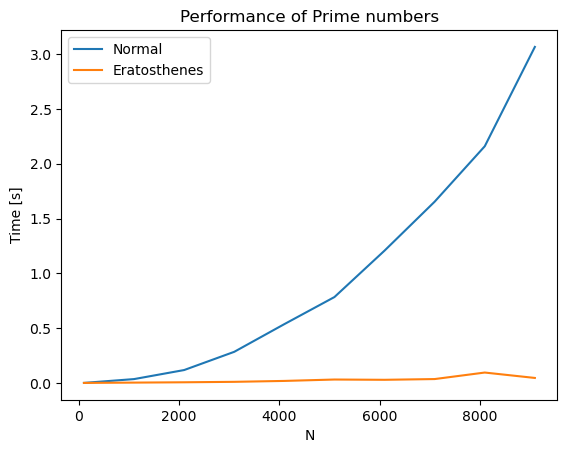

In [9]:
import math
import timeit
import matplotlib.pyplot as plt

#calcola i numeri primi contenuti in 0->N
def prime_numbers(N):
    if (N<0):
        return np.array(0)
    
    numbers=np.arange(0,N+1) #creo l'array con i numeri
    mask=[] #creo una maschera vuota
    
    for i in range (N+1):
        prime=True #di default considero il numero primo
        for x in range(i):
            if(x>1 and i%x==0): #se è divisibile non è primo
                prime=False
        mask.append(prime) #aggiungo il risultato alla maschera
        
    numbers=np.array(numbers) #converto in array numpy
    prime_numbers=numbers[mask] #applico la maschera
    #caso base: 0 e 1 non sono numeri primi
    if(prime_numbers.size>3):
        prime_numbers=np.delete(prime_numbers, [0,1])
    return prime_numbers


def prime_eratosthenes(N):
    numbers = np.arange(0, N)
    
    mask = np.full((N,), True) #inizialmente tutti Trueù
    
    for a in range(math.ceil(math.sqrt(N))): 
        
        #caso base
        if(a < 2): 
            mask[a] = False
            
        elif a >= 2:
            if mask[a] == True: #se il numero è già False non lo analizzo
                for b in numbers:
                    if numbers[b] % a == 0 and numbers[b] != a:
                        mask[b] = False
    #applico la maschera e ritorno il risultato
    return numbers[mask]


#faccio un test con N=100
N=100
print(f"TEST: prime numbers in 0->{N} are:\n{prime_numbers(N)}")
print(f"TEST: prime numbers with Eratosthenes in 0->{N} are:\n{prime_eratosthenes(N)}\n")

#calcolo e stampo le prestazioni al variare di N
times=[]
Ns=[]
times2=[]
Ns2=[]
for x in range (100, 10000, 1000):
    time = timeit.timeit(stmt='prime_numbers(x)', globals=globals(), number=1)
    time2 = timeit.timeit(stmt='prime_eratosthenes(x)', globals=globals(), number=1)
    times.append(time)
    Ns.append(x)
    times2.append(time2)
    Ns2.append(x)
    print(f"performances Normal with N={x}: {time}")
    print(f"performances Eratosthenes with N={x}: {time2}\n")
#--> aumentando N il tempo di esecuzione aumenta esponenzialmente (vedi grafico)

#PLOT:
plt.plot(Ns,times)
plt.plot(Ns2,times2)
plt.title("Performance of Prime numbers")
plt.xlabel("N")
plt.ylabel("Time [s]")
plt.legend(["Normal","Eratosthenes"])
plt.show()



8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)


Row sum/Distances:
[ 36  -6  16 -24   2 -12  10 -14   6   4  -2  14  10   6 -12   2  -6  -6
  -2  -6   2  -6 -34 -16   6 -20 -16  -4   2  10 -10  12 -32   0  -6 -10
 -18  -6  -8 -16  10 -20 -22  12  -4   8  12   4 -28  12  -4 -12  -6  10
  -8  -6  18   4   8   0 -18   6  10   2   2  16  36 -20  -8  22  -8  14
   4 -22  14  -4   6 -14   4  -2 -16   2  -8 -20  -8   2 -12 -16 -12  12
 -42 -18 -16   4   8 -10  24   6  -6 -22 -16  -2   4   4   8   2 -20 -10
 -16  -6   8 -12 -16  34  -6 -12   6   2   2 -10  -6   8   0   8  34 -20
 -12  26  24 -14   6   4  -8 -20   4  10  -8  14   4  24   4   8   6 -10
  14  30  34 -10   4   8  22   6   8  -2 -14 -10  -6  -4   0  -6   2  -4
  20  20  16  20 -14 -18 -10 -12 -12  -4  10  10   8   0  10  26  -2   4
   0 -20  20 -18  -2  -6  -8  -4  12 -12   0 -24   2 -22  30   6  -8  30
  -8  26 -20  14 -18 -18  24 -16  -2   6  -4   0  -4  -6   0  -2   8  28
   8   2   4  22  -8 -34   2 -28   4  14   4  -6   4  -6 -24  -4  18 -16
 -12  10  20  20  -2  20 -22   

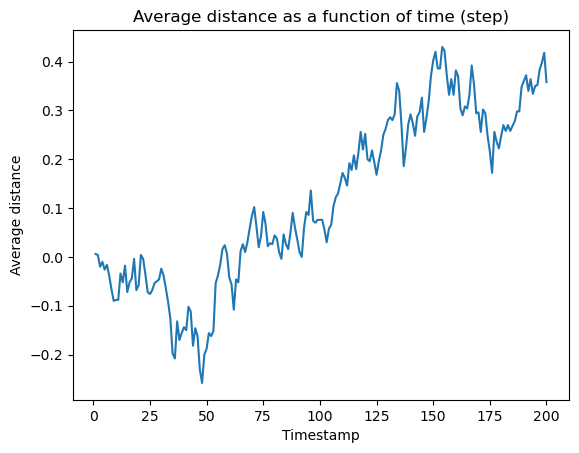

In [10]:
import numpy as np
import matplotlib.pyplot as plt

walkers=1000
steps=200

#creo la matrice con valori 0 o 1. lo zero corrisponde al -1
matr = np.random.randint(0,2,size=[walkers,steps])

#creo e apllico la maskera per sostituire gli zero con -1
mask=(matr==0) #maschera
matr[mask]=-1 #applico

#print(matr)

#calcolo la distanza per ogni walker (sommando le righe)
distances = np.sum(matr, axis=1)
print(f"\nRow sum/Distances:\n{distances}\n")

#calcolo il quadrato di ogni elemento dell'array
square = np.square(distances)
print(f"Square:\n{square}\n")

#calcolo la media delle distanze al quadrato
distances_mean = np.mean(matr**2, axis=0)
print(f"Square of Distance mean:\n{distances_mean}\n")

#PLOT
time = np.arange(1,201) #genero un vettore con 200 step temporali
mean_distance = matr.copy() 

#calcolo la distanza percorsa per ogni walker per ogni step temporale
for i in range(1,200):
    mean_distance[:,i]=mean_distance [:,i]+mean_distance[:,i-1]
    
#distanza media per ogni step temporale
mean_distance=mean_distance.mean(axis=0)

#plot
plt.title("Average distance as a function of time (step)")
plt.xlabel("Timestamp")
plt.ylabel("Average distance")
plt.plot(time, mean_distance)
plt.show()